# Capstone Project

<b> Project Objective : </b>  To build a NLP classifier which can use input text parameters to determine the labels of the blog. Specific to this case study, you can consider the text of the blog: 'text' feature as independent variable and 'topic' as dependent variable.

### Import Required Libraries

In [1]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle 
import urllib.request
import opendatasets as od

     |████████████████████████████████| 68 kB 2.0 MB/s 


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np
import re
import opendatasets as od
import time, pickle, os, datetime, warnings

# Natural Language Processing Libraries
from nltk import wordpunct_tokenize
from nltk.corpus import words, stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data Preprocessing and Model Scoring Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Data Visualization Libraries
from wordcloud import WordCloud 
import seaborn as sns
import matplotlib.pyplot as plt


# For sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from keras.utils import np_utils

##Varible Tansformation (Normalization and Scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# nltk downloaded (run only once)
nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library

True

### Setup or Initialize Variables

In [ ]:
# Suppress display of warnings
warnings.filterwarnings('ignore')

# To display matplotlib charts inline
%matplotlib inline

# To cache the stopwords 
cachedStopWords = stopwords.words("english")

# To return the root word 
lemmatizer = WordNetLemmatizer()

# To cache dictionary words 
words = set(words.words())

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## Milestone 1

### Step 1: Import the data

#### Import and Load the Data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
dfIndustrialSafety= pd.read_csv('/content/drive/My Drive/Colab Notebooks/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv',na_values = ' ')
print(dfIndustrialSafety.shape)

(425, 11)


In [ ]:
# Download data from kaggle
od.download("https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database")

# Load data from folder
#dfIndustrialSafety = pd.read_csv(r'C:\Users\lourd\OneDrive\Documents\NLP Capstone Project\industrial-safety-and-health-analytics-database\IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

Skipping, found downloaded files in "./industrial-safety-and-health-analytics-database" (use force=True to force download)


#### Initial Data Analysis

In [ ]:
# Print top 5 rows of dataset
dfIndustrialSafety.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
# Print bottom 5 rows of dataset
dfIndustrialSafety.tail(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...
424,438,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ..."


In [ ]:
# Print shape of dataset
print("Total No of rows = {0} and Total No of Columns = {1} in the Data frame -> dfIndustrialSafety".format(dfIndustrialSafety.shape[0], dfIndustrialSafety.shape[1]))

Total No of rows = 425 and Total No of Columns = 11 in the Data frame -> dfIndustrialSafety


In [ ]:
# Print data type of features
dfIndustrialSafety.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

<b> Observation: </b>
1.   Except first column ('Unnamed: 0') all other column data type is object
2.   Categorical columns :
    - 'Countries', 
    - 'Local', 
    - 'Industry Sector',
    - 'Accident Level', 
    - 'Potential Accident Level', 
    - 'Genre', 
    - 'Employee or Third Party',
    - 'Critical Risk', 
    - 'Description'
3.   Date column : 
    - 'Data'  

In [ ]:
# Print info on dataset
dfIndustrialSafety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


#### Exploratory Data Analysis - 01

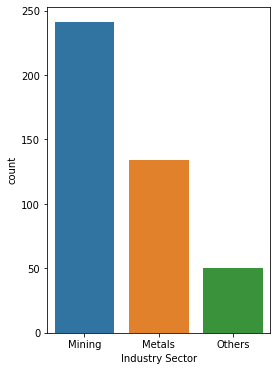

In [ ]:
# Print count chart for Industry Sector
fig, ax = plt.subplots(figsize = (4, 6))
sns.countplot(x=dfIndustrialSafety['Industry Sector'])

<b> Observation </b> : Mining Industry have more accidents reported, Arround 240 incidents are recorded

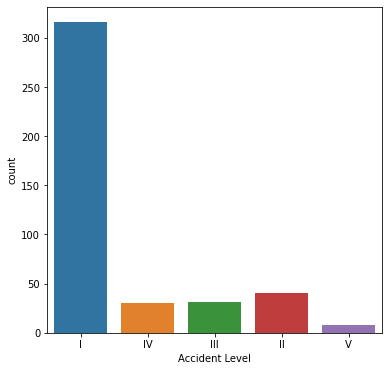

In [ ]:
# Print count chart for accident level
fig, ax = plt.subplots(figsize = (6, 6))
sns.countplot(x=dfIndustrialSafety['Accident Level'])

<b> Observation </b> : Count of accident is high for the level 1 which is 310 and level 5 has least count of just 5.

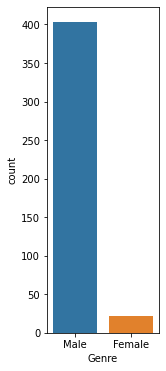

In [ ]:
# Print count chart for gender level
fig, ax = plt.subplots(figsize = (2, 6))
sns.countplot(x=dfIndustrialSafety['Genre']);

<b> Observation </b> : In the given accidents data, 95 % of data are male and only 5 % are female

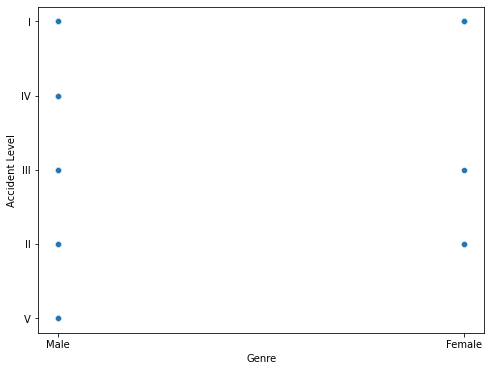

In [ ]:
# Print scatter chart for Genre and Accident Level
fig, ax = plt.subplots(figsize = (8, 6))
sns.scatterplot(x=dfIndustrialSafety['Genre'],y=dfIndustrialSafety['Accident Level'])

<b> Observation </b> : Female employees are not reported with any 4 or 5 accident level where as male are in all the level

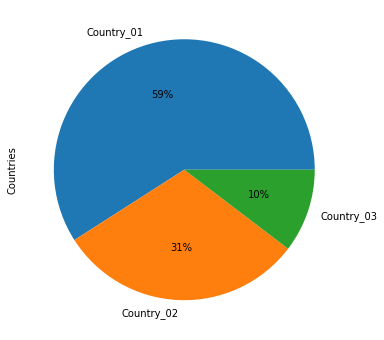

In [ ]:
# Print pie chart for Genre and Accident Level
dfIndustrialSafety['Countries'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (8, 6))

<b> Observation </b> : More than half (59%) of the accidents occurred in Country_01

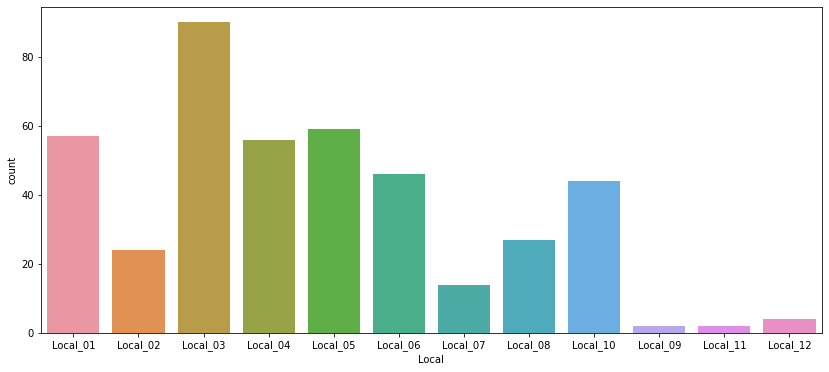

In [ ]:
# Print count chart for local
fig, ax = plt.subplots(figsize = (14, 6))
sns.countplot(x=dfIndustrialSafety['Local']);

<b> Observations </b> :  Local_03, Local05, Local04, Local01 is where most of the accidents have happened.

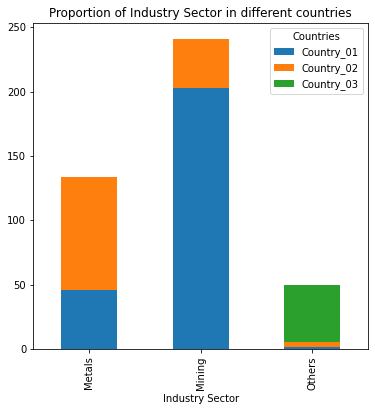

In [ ]:
# Print stacked bar chart for proportion of industry sector accidents by country
indsec_cntry_table = pd.crosstab(index = dfIndustrialSafety['Industry Sector'], columns = dfIndustrialSafety['Countries'])
indsec_cntry_table.plot(kind = 'bar', stacked = True, figsize = (6, 6))
plt.title("Proportion of Industry Sector in different countries")
plt.show()

<b> Observations </b> :  Metals and Mining industry sector plants are not available or accidents dont happen in Country_03.

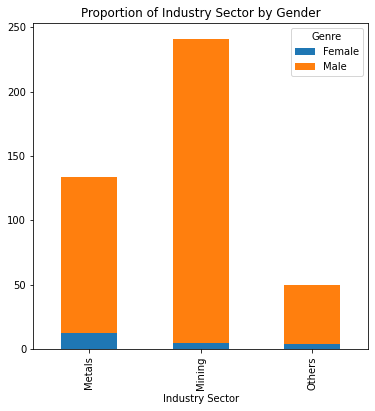

In [ ]:
# Print stacked bar chart for proportion of industry sector accidents by gender
indsec_cntry_table = pd.crosstab(index = dfIndustrialSafety['Industry Sector'], columns = dfIndustrialSafety['Genre'])
indsec_cntry_table.plot(kind = 'bar', stacked = True, figsize = (6, 6))
plt.title("Proportion of Industry Sector by Gender")
plt.show()

<b> Observations </b> :  Most accidents for Female happened in Metals and for Male happened in Mining.

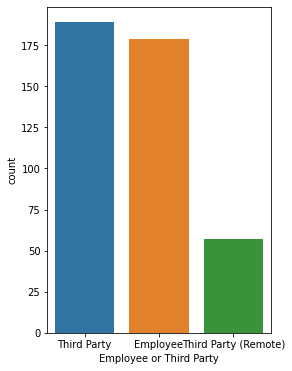

In [ ]:
# Print count chart for Employee Type
fig, ax = plt.subplots(figsize = (4, 6))
sns.countplot(x=dfIndustrialSafety['Employee or Third Party']);




<b> Observations </b> :  Third Party and Employee have most accidents and People working in remote have less accidents.

### Step 2: Data cleansing

#### Remove and Rename Required Columns 

In [ ]:
# Remove "Unnamed: 0 " as it is not useful
dfIndustrialSafety.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Rename some Columns to meaningful names
dfIndustrialSafety.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

#### Check for Duplicate, Null and Outlier Values

In [ ]:
# Check for duplicate values
print('Number of Duplicate records before -->',dfIndustrialSafety.duplicated().sum())

# Drop Duplicates -> As these are repeatative data for processing which is of no use
dfIndustrialSafety.drop_duplicates(inplace=True, ignore_index=True)

# Check for duplicate values again
print('Number of Duplicate records after -->',dfIndustrialSafety.duplicated().sum())

Number of Duplicate records before --> 7
Number of Duplicate records after --> 0


In [ ]:
# Check for null values
dfIndustrialSafety.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
# Check for Unique values of each column to see if any kind of abnormal data range (Outlier)
for x in dfIndustrialSafety.columns:
    if x != 'Description':
      print('--'*30)
      print(f'Unique values of "{x}" column')
      print('--'*30)
      print(dfIndustrialSafety[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

<b> Data Cleansing Summary </b>
- Unwanted column removal - removed column name - 'Unnamed: 0' as it resemble same as index values having values 0,1,...
-  Rename: 'Data'-->'Date' | 'Countries'-->'Country' | 'Genre'-->'Gender' | 'Employee or Third Party'-->'Employee type'.
-  Dataframe had 7 duplicate values , those all where removed and captured in  Data Frame --> **Industrial_Safety_Cl_df**
-  No missing values in the data frame -> **Industrial_Safety_Cl_df**
-  After Data Cleaning -> **Industrial_Safety_Cl_df** has 418 rows and 10 column

### Step 3: Data preprocessing 

#### Data Preprocessing - Description Column

In [ ]:
# Print random text sample 
dfIndustrialSafety['Description'][3]

'Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.'

In [ ]:
# Function to eliminate special characters and numbers
def eliminate_special_chars_and_numbs(text):
    return re.sub(r"[^A-Za-z]+"," ", text)

dfIndustrialSafety['Description'] = dfIndustrialSafety['Description'].apply(eliminate_special_chars_and_numbs)

In [ ]:
# Function to convert to lower case 
def return_lower_case(text):
    return text.lower()   

dfIndustrialSafety['Description'] = dfIndustrialSafety['Description'].apply(return_lower_case)

In [ ]:
# Function to remove stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text   

dfIndustrialSafety['Description'] = dfIndustrialSafety['Description'].apply(remove_stopwords)

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Function to return lemmas
def return_lemmas(text):
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text 

dfIndustrialSafety['Description'] = dfIndustrialSafety['Description'].apply(return_lemmas)

In [ ]:
# Function to remove extra whitespaces
def remove_extra_white_spaces(text):
    text = re.sub(' +', ' ', text)
    text = text.rstrip()
    text = text.lstrip()
    return text 

dfIndustrialSafety['Description'] = dfIndustrialSafety['Description'].apply(remove_extra_white_spaces)

In [ ]:
# Function to remove invalid english words
def remove_invalidwords(text):
    text = " ".join(word for word in wordpunct_tokenize(text) if word.lower() in words or not word.isalpha())
    return text 

dfIndustrialSafety['Description'] = dfIndustrialSafety['Description'].apply(remove_invalidwords)

In [ ]:
# Print the same random sample again
dfIndustrialSafety['Description'][3]

'approximately personnel begin task unlocking bolt machine penultimate bolt hexagonal head worn proceeding bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moment two collaborator rotate lever anti clockwise direction leaving key bolt palm left hand causing injury'

#### Data Preprocessing - Other Columns

In [ ]:
# Print top 3 columns
dfIndustrialSafety.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,sub station level collaborator excavation work...


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Function to return sentiment score
def return_sentiment_score(text):
    sentiAnalyzer = SentimentIntensityAnalyzer()
    sentiScore = sentiAnalyzer.polarity_scores(text)["compound"]
    return float(sentiScore)

dfIndustrialSafety['Sentiment Score'] = dfIndustrialSafety['Description'].apply(return_sentiment_score)

In [ ]:
# Function to return weekName, weekOfMonth, month
def return_date_features(date):
    date = pd.to_datetime(date)
    weekName = date.day_name()
    weekOfMonth = (date.day - 1) // 7 + 1
    month = date.month
    return weekName, weekOfMonth, month

dfIndustrialSafety['Week Name'],  dfIndustrialSafety['Week of Month'], dfIndustrialSafety['Month']  = zip(*dfIndustrialSafety['Date'].apply(return_date_features))

In [ ]:
# Function to return season
def return_season(date):
    date = pd.to_datetime(date)
    if date.month in [9, 10, 11]:
        brazilSeason = 'Spring'
    elif date.month in [12, 1, 2]:
        brazilSeason = 'Summer'
    elif date.month in [3, 4, 5]:
        brazilSeason = 'Autumn'
    elif date.month in [6, 7, 8]:
        brazilSeason = 'Winter'
    return brazilSeason

dfIndustrialSafety['Season'] = dfIndustrialSafety['Date'].apply(return_season)

In [ ]:
# Print top 3 columns again
dfIndustrialSafety.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Sentiment Score,Week Name,Week of Month,Month,Season
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...,0.8834000,Friday,1,1,Summer
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...,0.2732000,Saturday,1,1,Summer
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,sub station level collaborator excavation work...,0.4939000,Wednesday,1,1,Summer


#### Exploratory Data Analysis - 02

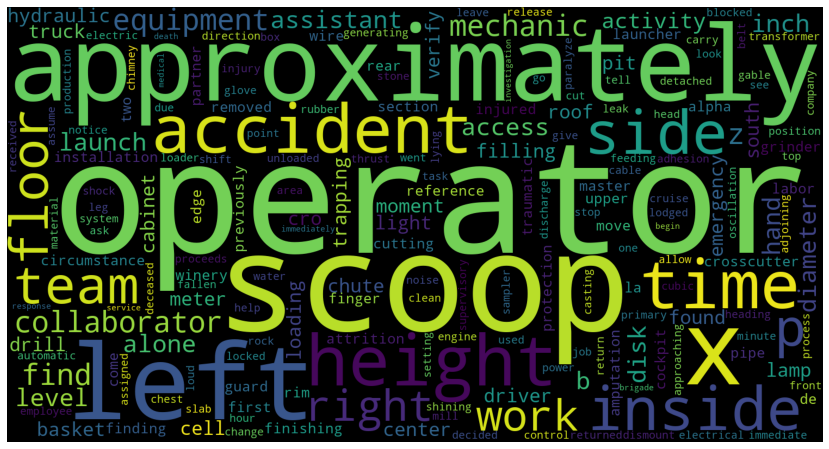

In [ ]:
# Print word cloud for extreme accident level
dfIndustrialSafetyFiltered = dfIndustrialSafety[dfIndustrialSafety['Accident Level'] .isin(['V'])] 
wordcloud = WordCloud(width = 1500, height = 800, random_state=1, min_font_size=6, max_words=500, collocations=False).generate(" ".join(dfIndustrialSafetyFiltered['Description'].values))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<b> Observation </b> : 'operator', 'scoop', 'time', 'approximately', 'left' are the most used words for extreme Accident Level

In [ ]:
# Print Min and Max sentence length of Description
dfLengthCheck = dfIndustrialSafety['Description'].str.len()

print('Minimum line length: {}'.format(dfLengthCheck.min()))
print('Maximum line length: {}'.format(dfLengthCheck.max()))

Minimum line length: 49
Maximum line length: 592


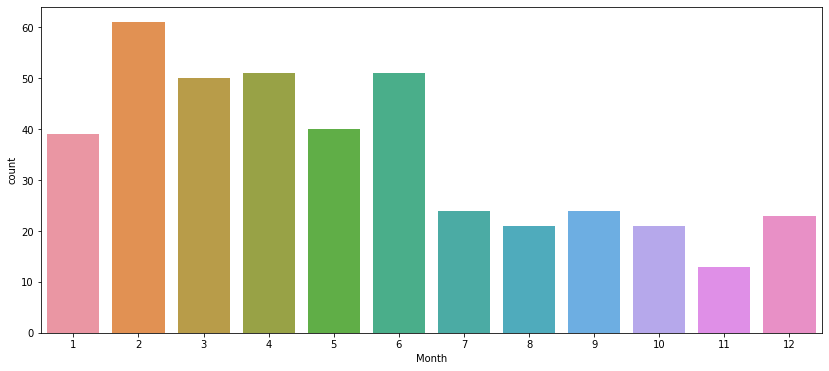

In [ ]:
# Print count plot of accidents by Month
fig, ax = plt.subplots(figsize = (14, 6))
sns.countplot(x="Month", data=dfIndustrialSafety)
plt.show()

<b> Observation </b> : Most of the accidents have happened on 2rd, 3rd, 4th and 5th Month of the year.

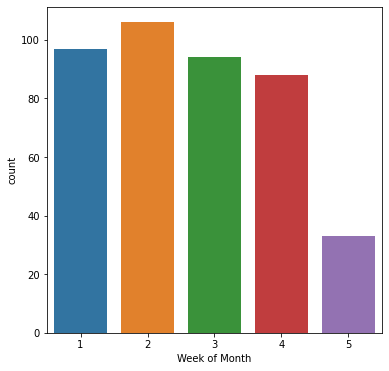

In [ ]:
# Print count plot of accidents by Week of Month
fig, ax = plt.subplots(figsize = (6, 6))
sns.countplot(x="Week of Month", data=dfIndustrialSafety)
plt.show()

<b> Observation </b> : 2nd week of every month is when accidents have happened mostly. 

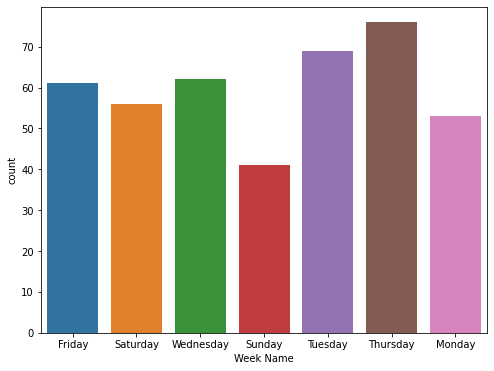

In [ ]:
# Print count plot of accidents by Weekday
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(x="Week Name", data=dfIndustrialSafety)
plt.show()

<b> Observation </b> : Thurday and Tuesday of the week is when most of the accidents have happened 

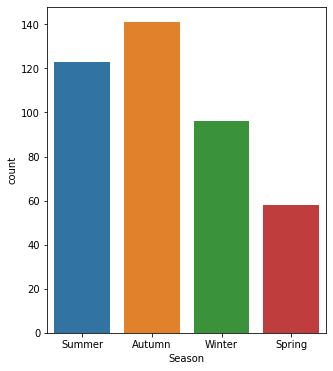

In [ ]:
# Print count plot of accidents by Season
fig, ax = plt.subplots(figsize = (5, 6))
sns.countplot(x="Season", data=dfIndustrialSafety)
plt.show()

<b> Observation </b> : Autumn and Summer Season is when most of the accidents have happened.

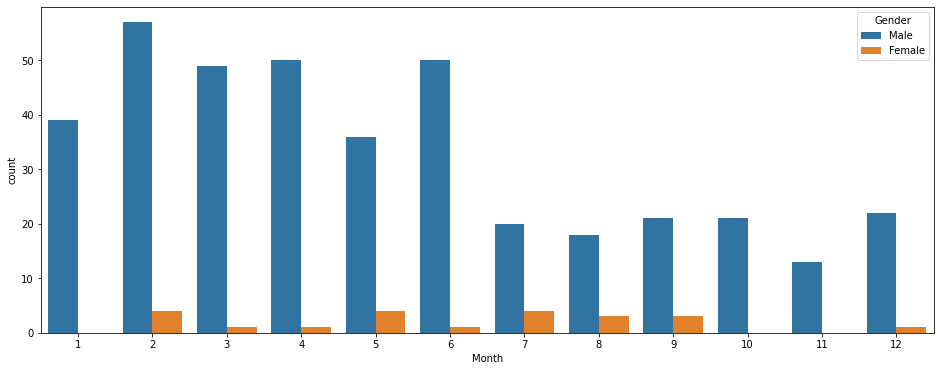

In [ ]:
# Print count plot of accidents by Month and Hue as Gender
fig, ax = plt.subplots(figsize = (16, 6))
sns.countplot(x="Month", hue="Gender" , data=dfIndustrialSafety)
plt.show()

<b> Observation </b> : Female Employees don't get into accident on 10, 11 and 1 and Male Employees get into accident mostly on first half of the year. 

#### Exploratory Data Analysis - Summary

- Based on Initial Analysis of Data
    - Accidents are recorded between 01.01.2016 to 09.07.2017 for span more than a year.
    - Three Country value of Country_01,02,03
    - 12 localaties of the unit Local_01 to Local_12
    - It covers three sectors Mining, Metals, Others
    - There are 5 Accident Level I to V
    - Six Potential Accident Levels I to VI
    - Two Genders Male / Female
    - Three Employee Type -> Employee , Third Party & Third Party (Remote)
    - Critical Risk Column has critical risk descriptions

- Based on Exploratory Data Analysis (EDA)
    - Mining Industry have more accidents reported, Arround 240 incidents are recorded.
    - Count of accident is high for the level 1 which is 310 and level 5 has least count of just 5.
    - In the given accidents data, 95 % of data are male and only 5 % are female.
    - Female employees are not reported with any 4 or 5 accident level where as male are in all the level.
    - More than half (59%) of the accidents occurred in Country_01
    - Local_03, Local05, Local04, Local01 is where most of the accidents have happened.
    - Metals and Mining industry sector plants are not available or accidents dont happen in Country_03.
    - Most accidents for Female happened in Metals and for Male happened in Mining.
    - Third Party and Employee have most accidents and People working in remote have less accidents.
    - 'operator', 'scoop', 'time', 'approximately', 'left' are the most used words for extreme Accident Level.
    - Post NLP based cleanup, Description -> Minimum line length: 49; Maximum line length: 592.
    - Most of the accidents have happened on 2rd, 3rd, 4th and 5th Month of the year.
    - 2nd week of every month is when accidents have happened mostly. 
    - Thurday and Tuesday of the week is when most of the accidents have happened.
    - Autumn and Summer Season is when most of the accidents have happened.
    - Female Employees mostly don't get into accident on October, November and January.
    - Male Employees get into accident mostly on first half of the year.

#### Step 4: Data preparation

Generate one hot encoding and categorical encoding for category columns

In [ ]:
Accident_Level_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Accident Level']= Accident_Level_label_encoder.fit_transform(dfIndustrialSafety['Accident Level'])

Potential_Accident_Level_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Potential Accident Level']= Potential_Accident_Level_label_encoder.fit_transform(dfIndustrialSafety['Potential Accident Level'])

Country_Level_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Country']= Country_Level_label_encoder.fit_transform(dfIndustrialSafety['Country'])

Season_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Season']= Season_label_encoder.fit_transform(dfIndustrialSafety['Season'])

Local_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Local']= Local_label_encoder.fit_transform(dfIndustrialSafety['Local'])

Industry_Sector_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Industry Sector']= Industry_Sector_label_encoder.fit_transform(dfIndustrialSafety['Industry Sector'])

Week_Name_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Week Name']= Week_Name_label_encoder.fit_transform(dfIndustrialSafety['Week Name'])

Critical_Risk_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Critical Risk']= Critical_Risk_label_encoder.fit_transform(dfIndustrialSafety['Critical Risk'])

Gender_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Gender']= Gender_label_encoder.fit_transform(dfIndustrialSafety['Gender'])

Employee_type_label_encoder = preprocessing.LabelEncoder()
dfIndustrialSafety['Employee type']= Employee_type_label_encoder.fit_transform(dfIndustrialSafety['Employee type'])


dfIndustrialSafety.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Sentiment Score,Week Name,Week of Month,Month,Season
0,2016-01-01 00:00:00,0,0,1,0,3,1,1,20,removing drill rod jumbo maintenance superviso...,0.8834000,0,1,1,2
1,2016-01-02 00:00:00,1,1,1,0,3,1,0,21,activation sodium sulphide pump piping uncoupl...,0.2732000,2,1,1,2
2,2016-01-06 00:00:00,0,2,1,0,2,1,2,15,sub station level collaborator excavation work...,0.4939000,6,1,1,2


Create Count vectorizer, TFIDF vectorizer and Glove embeddings for Description

In [ ]:
# TFIDF vectorizer
TFIDF_Dataframe = pd.DataFrame()
for i in [1,2,3]:
    TFIDF_vectorizer = TfidfVectorizer(max_features=30, use_idf=True, ngram_range=(i,i))
    vectors = TFIDF_vectorizer.fit_transform(dfIndustrialSafety['Description']).toarray()
    tfs = pd.DataFrame(vectors, columns=["TFIDF_" + n for n in TFIDF_vectorizer.get_feature_names()])
    TFIDF_Dataframe = pd.concat([ TFIDF_Dataframe.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

TFIDF_Dataframe.tail(3)

,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_assistant,TFIDF_causing,TFIDF_collaborator,TFIDF_employee,TFIDF_equipment,TFIDF_fall,TFIDF_finger,TFIDF_floor,TFIDF_hand,TFIDF_hit,TFIDF_injury,TFIDF_left,TFIDF_level,TFIDF_mesh,TFIDF_meter,TFIDF_moment,TFIDF_one,TFIDF_operator,TFIDF_pipe,TFIDF_right,TFIDF_rock,TFIDF_safety,TFIDF_support,TFIDF_time,TFIDF_work,TFIDF_worker,TFIDF_accident employee,TFIDF_allergic reaction,TFIDF_causing cut,TFIDF_causing injury,TFIDF_circumstance worker,TFIDF_da silva,TFIDF_employee report,TFIDF_employee used,TFIDF_finger left,TFIDF_finger right,TFIDF_fragment rock,TFIDF_generating injury,TFIDF_hand causing,TFIDF_injured person,TFIDF_injury time,TFIDF_left foot,TFIDF_left hand,TFIDF_left leg,TFIDF_made use,TFIDF_medical center,TFIDF_middle finger,TFIDF_right hand,TFIDF_right leg,TFIDF_right side,TFIDF_safety glove,TFIDF_split set,TFIDF_support mesh,TFIDF_time accident,TFIDF_time event,TFIDF_wearing safety,TFIDF_accident worker wearing,TFIDF_allergic reaction returned,TFIDF_back right hand,TFIDF_causing injury time,TFIDF_collaborator causing injury,TFIDF_collaborator time event,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating injury time,TFIDF_hand causing injury,TFIDF_hand generating injury,TFIDF_hit back right,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_made use safety,TFIDF_medical center attention,TFIDF_place clerk wearing,TFIDF_reaction returned normal,TFIDF_returned normal activity,TFIDF_right hand causing,TFIDF_st degree burn,TFIDF_thermal recovery boiler,TFIDF_time accident employee,TFIDF_time accident operator,TFIDF_time accident worker,TFIDF_type allergic reaction,TFIDF_used leather glove,TFIDF_used safety glass,TFIDF_wearing safety glove,TFIDF_worker wearing safety
415,0.0000000,0.3697247,0.0000000,0.4334050,0.0000000,0.0000000,0.0000000,0.3119652,0.0000000,0.0000000,0.4200414,0.0000000,0.3140674,0.0000000,0.0000000,0.3161992,0.0000000,0.0000000,0.0000000,0.0000000,0.4506511,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.5662897,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4316110,0.0000000,0.0000000,0.0000000,0.7021595,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
416,0.0000000,0.3402454,0.0000000,0.0000000,0.0000000,0.2760162,0.0000000,0.2870912,0.0000000,0.0000000,0.3865502,0.0000000,0.5780517,0.3967217,0.0000000,0.2909877,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7953287,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.6061784,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
417,0.0000000,0.0000000,0.0000000,0.0000000,0.4216020,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8484398,0.0000000,0.0000000,0.3200025,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000

In [ ]:
# Count vectorizer
CountDF_Dataframe = pd.DataFrame()
for i in [1,2,3]:
    CountDF_vectorizer = CountVectorizer(max_features=30, ngram_range=(i,i))
    vectors_ct = CountDF_vectorizer.fit_transform(dfIndustrialSafety['Description']).toarray()
    tfs_ct = pd.DataFrame(vectors_ct, columns=["CountDF_" + n for n in CountDF_vectorizer.get_feature_names()])
    CountDF_Dataframe = pd.concat([ CountDF_Dataframe.reset_index(drop=True), tfs_ct.reset_index(drop=True)], axis=1)

CountDF_Dataframe.head(3)

,CountDF_accident,CountDF_activity,CountDF_approximately,CountDF_area,CountDF_assistant,CountDF_causing,CountDF_collaborator,CountDF_employee,CountDF_equipment,CountDF_fall,CountDF_finger,CountDF_floor,CountDF_hand,CountDF_hit,CountDF_injury,CountDF_left,CountDF_level,CountDF_mesh,CountDF_meter,CountDF_moment,CountDF_one,CountDF_operator,CountDF_pipe,CountDF_right,CountDF_rock,CountDF_safety,CountDF_support,CountDF_time,CountDF_work,CountDF_worker,CountDF_accident employee,CountDF_allergic reaction,CountDF_causing cut,CountDF_causing injury,CountDF_circumstance worker,CountDF_da silva,CountDF_employee report,CountDF_employee used,CountDF_finger left,CountDF_finger right,CountDF_fragment rock,CountDF_generating injury,CountDF_hand causing,CountDF_injured person,CountDF_injury time,CountDF_left foot,CountDF_left hand,CountDF_left leg,CountDF_made use,CountDF_medical center,CountDF_middle finger,CountDF_right hand,CountDF_right leg,CountDF_right side,CountDF_safety glove,CountDF_split set,CountDF_support mesh,CountDF_time accident,CountDF_time event,CountDF_wearing safety,CountDF_accident worker wearing,CountDF_allergic reaction returned,CountDF_back right hand,CountDF_causing injury time,CountDF_collaborator causing injury,CountDF_collaborator time event,CountDF_finger left hand,CountDF_finger right hand,CountDF_generating injury time,CountDF_hand causing injury,CountDF_hand generating injury,CountDF_hit back right,CountDF_injury time accident,CountDF_left hand causing,CountDF_made use safety,CountDF_medical center attention,CountDF_place clerk wearing,CountDF_reaction returned normal,CountDF_returned normal activity,CountDF_right hand causing,CountDF_st degree burn,CountDF_thermal recovery boiler,CountDF_time accident employee,CountDF_time accident operator,CountDF_time accident worker,CountDF_type allergic reaction,CountDF_used leather glove,CountDF_used safety glass,CountDF_wearing safety glove,CountDF_worker wearing safety
0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,2,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test and identify best vectorizer for Description column

In [ ]:
# Get x and y
x = dfIndustrialSafety.drop(['Accident Level','Potential Accident Level'], axis = 1)
y = dfIndustrialSafety['Accident Level']

In [ ]:
# Train Test Split TFIDF and CountDF
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1, stratify = y)
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(TFIDF_Dataframe, y, test_size = 0.20, random_state = 1, stratify = y)
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(CountDF_Dataframe, y, test_size = 0.20, random_state = 1, stratify = y)

In [ ]:
print( "Basic Logistic Regression Model ")
print( "------------------------------------------------------------------------------------------------------------")

model = LogisticRegression(solver='lbfgs')
clf = model.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = clf.predict(x_test_tfidf)

# Generate performance scores
accuracy =  accuracy_score(y_test_tfidf, y_pred_tfidf)
precision, recall, f_score, base_support = precision_recall_fscore_support(y_test_tfidf, y_pred_tfidf, average='macro')

# Print performance scores
print('TFIDF   || acc:', accuracy, 'pre:',precision, 'rec:',recall, 'f1s:',f_score)

model = LogisticRegression(solver='lbfgs')
clf = model.fit(x_train_cv, y_train_cv)
y_pred_cv = clf.predict(x_test_cv)

# Generate performance scores
accuracy =  accuracy_score(y_test_cv, y_pred_cv)
precision, recall, f_score, base_support = precision_recall_fscore_support(y_test_cv, y_pred_cv, average='macro')

# Print performance scores
print('CountDF || acc:', accuracy, 'pre:',precision, 'rec:',recall, 'f1s:',f_score)

Basic Logistic Regression Model 
------------------------------------------------------------------------------------------------------------
TFIDF   || acc: 0.7380952380952381 pre: 0.14761904761904762 rec: 0.2 f1s: 0.16986301369863016
CountDF || acc: 0.6785714285714286 pre: 0.14805194805194805 rec: 0.18387096774193548 f1s: 0.16402877697841728


In [ ]:
print( "Basic Random Forest Model ")
print( "------------------------------------------------------------------------------------------------------------")

model = RandomForestClassifier(n_estimators=20, random_state=1)
clf = model.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = clf.predict(x_test_tfidf)

# Generate performance scores
accuracy =  accuracy_score(y_test_tfidf, y_pred_tfidf)
precision, recall, f_score, base_support = precision_recall_fscore_support(y_test_tfidf, y_pred_tfidf, average='macro')

# Print performance scores
print('TFIDF   || acc:', accuracy, 'pre:',precision, 'rec:',recall, 'f1s:',f_score)

model = RandomForestClassifier(n_estimators=20, random_state=1)
clf = model.fit(x_train_cv, y_train_cv)
y_pred_cv = clf.predict(x_test_cv)

# Generate performance scores
accuracy =  accuracy_score(y_test_cv, y_pred_cv)
precision, recall, f_score, base_support = precision_recall_fscore_support(y_test_cv, y_pred_cv, average='macro')

# Print performance scores
print('CountDF || acc:', accuracy, 'pre:',precision, 'rec:',recall, 'f1s:',f_score)

Basic Random Forest Model 
------------------------------------------------------------------------------------------------------------
TFIDF   || acc: 0.7023809523809523 pre: 0.14750000000000002 rec: 0.1903225806451613 f1s: 0.16619718309859155
CountDF || acc: 0.7142857142857143 pre: 0.14814814814814814 rec: 0.1935483870967742 f1s: 0.16783216783216784


In [ ]:
print( "Basic KNNeighbours Model ")
print( "------------------------------------------------------------------------------------------------------------")

model = KNeighborsClassifier()
clf = model.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = clf.predict(x_test_tfidf)

# Generate performance scores
accuracy =  accuracy_score(y_test_tfidf, y_pred_tfidf)
precision, recall, f_score, base_support = precision_recall_fscore_support(y_test_tfidf, y_pred_tfidf, average='macro')

# Print performance scores
print('TFIDF   || acc:', accuracy, 'pre:',precision, 'rec:',recall, 'f1s:',f_score)

model = KNeighborsClassifier()
clf = model.fit(x_train_cv, y_train_cv)
y_pred_cv = clf.predict(x_test_cv)

# Generate performance scores
accuracy =  accuracy_score(y_test_cv, y_pred_cv)
precision, recall, f_score, base_support = precision_recall_fscore_support(y_test_cv, y_pred_cv, average='macro')

# Print performance scores
print('CountDF || acc:', accuracy, 'pre:',precision, 'rec:',recall, 'f1s:',f_score)

Basic KNNeighbours Model 
------------------------------------------------------------------------------------------------------------
TFIDF   || acc: 0.7380952380952381 pre: 0.14761904761904762 rec: 0.2 f1s: 0.16986301369863016
CountDF || acc: 0.7142857142857143 pre: 0.15 rec: 0.1935483870967742 f1s: 0.16901408450704225


<b> Observation </b> : Comparatively TFIDF Vectorized dataset is giving better score than Count Vectorizer. Hence choosing TFIDF for the next steps. 

Merge best vectorizer dataframe with encoded main dataframe 

In [ ]:
# Merge TFIDF vectorized dataset with main dataset
dfIndustrialSafety_merged = dfIndustrialSafety.drop(['Description', 'Date'], axis = 1).join(TFIDF_Dataframe.reset_index(drop=True))

# Print merged dataframe's column names
dfIndustrialSafety_merged.head(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Sentiment Score,Week Name,Week of Month,Month,Season,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_assistant,TFIDF_causing,TFIDF_collaborator,TFIDF_employee,TFIDF_equipment,TFIDF_fall,TFIDF_finger,TFIDF_floor,TFIDF_hand,TFIDF_hit,TFIDF_injury,TFIDF_left,TFIDF_level,TFIDF_mesh,TFIDF_meter,TFIDF_moment,TFIDF_one,TFIDF_operator,TFIDF_pipe,TFIDF_right,TFIDF_rock,TFIDF_safety,TFIDF_support,TFIDF_time,TFIDF_work,TFIDF_worker,TFIDF_accident employee,TFIDF_allergic reaction,TFIDF_causing cut,TFIDF_causing injury,TFIDF_circumstance worker,TFIDF_da silva,TFIDF_employee report,TFIDF_employee used,TFIDF_finger left,TFIDF_finger right,TFIDF_fragment rock,TFIDF_generating injury,TFIDF_hand causing,TFIDF_injured person,TFIDF_injury time,TFIDF_left foot,TFIDF_left hand,TFIDF_left leg,TFIDF_made use,TFIDF_medical center,TFIDF_middle finger,TFIDF_right hand,TFIDF_right leg,TFIDF_right side,TFIDF_safety glove,TFIDF_split set,TFIDF_support mesh,TFIDF_time accident,TFIDF_time event,TFIDF_wearing safety,TFIDF_accident worker wearing,TFIDF_allergic reaction returned,TFIDF_back right hand,TFIDF_causing injury time,TFIDF_collaborator causing injury,TFIDF_collaborator time event,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating injury time,TFIDF_hand causing injury,TFIDF_hand generating injury,TFIDF_hit back right,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_made use safety,TFIDF_medical center attention,TFIDF_place clerk wearing,TFIDF_reaction returned normal,TFIDF_returned normal activity,TFIDF_right hand causing,TFIDF_st degree burn,TFIDF_thermal recovery boiler,TFIDF_time accident employee,TFIDF_time accident operator,TFIDF_time accident worker,TFIDF_type allergic reaction,TFIDF_used leather glove,TFIDF_used safety glass,TFIDF_wearing safety glove,TFIDF_worker wearing safety
0,0,0,1,0,3,1,1,20,0.8834000,0,1,1,2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2639351,0.0000000,0.2460077,0.0000000,0.1839414,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2183476,0.2639351,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8477303,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
1,1,1,1,0,3,1,0,21,0.2732000,2,1,1,2,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
2,0,2,1,0,2,1,2,15,0.4939000,6,1,1,2,0.0000000,0.0000000,0.0000000,0.2950993,0.0000000,0.2042185,0.5808988,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2138440,0.0000000,0.2399496,0.

In [ ]:
cnt=0
for column_headers in dfIndustrialSafety_merged.columns: 
    cnt = cnt + 1
    print(column_headers)
   

Country
Local
Industry Sector
Accident Level
Potential Accident Level
Gender
Employee type
Critical Risk
Sentiment Score
Week Name
Week of Month
Month
Season
TFIDF_accident
TFIDF_activity
TFIDF_approximately
TFIDF_area
TFIDF_assistant
TFIDF_causing
TFIDF_collaborator
TFIDF_employee
TFIDF_equipment
TFIDF_fall
TFIDF_finger
TFIDF_floor
TFIDF_hand
TFIDF_hit
TFIDF_injury
TFIDF_left
TFIDF_level
TFIDF_mesh
TFIDF_meter
TFIDF_moment
TFIDF_one
TFIDF_operator
TFIDF_pipe
TFIDF_right
TFIDF_rock
TFIDF_safety
TFIDF_support
TFIDF_time
TFIDF_work
TFIDF_worker
TFIDF_accident employee
TFIDF_allergic reaction
TFIDF_causing cut
TFIDF_causing injury
TFIDF_circumstance worker
TFIDF_da silva
TFIDF_employee report
TFIDF_employee used
TFIDF_finger left
TFIDF_finger right
TFIDF_fragment rock
TFIDF_generating injury
TFIDF_hand causing
TFIDF_injured person
TFIDF_injury time
TFIDF_left foot
TFIDF_left hand
TFIDF_left leg
TFIDF_made use
TFIDF_medical center
TFIDF_middle finger
TFIDF_right hand
TFIDF_right leg
TFIDF_

#### Step 5: Build machine learning classifiers 

Build function to design train and test basic machine learning classifiers

In [ ]:
def identify_best_model(model, x_train, y_train, metric):
    
    # Build all possible params for each classifier model
    if type(model).__name__ == 'LogisticRegression':   
        parameters = { 'C':[100, 10, 1.0, 0.1, 0.01], 'penalty':['none', 'l1', 'l2'], 'solver' :['newton-cg', 'liblinear', 'sag', 'saga']}
    
    elif type(model).__name__ == 'GaussianNB' :
        parameters = { 'var_smoothing': np.logspace(0,-9, num=100)}
    
    elif type(model).__name__ == 'KNeighborsClassifier' :
        parameters = {'n_neighbors': range(3, 21, 2), 'weights': ['uniform', 'distance']}
    
    elif type(model).__name__ == 'DecisionTreeClassifier' :
        parameters = { 'max_leaf_nodes': [None, 4,5,6,7,8], 'min_samples_split': [2, 3, 4], 'criterion':['gini','entropy'], 'max_depth':[None, 4,5,6,7,8]}
    
    elif type(model).__name__ == 'RandomForestClassifier' :
        parameters = { 'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
    
    elif type(model).__name__ == 'AdaBoostClassifier' :
        parameters = {'n_estimators': np.arange(30,100,10),'learning_rate': np.arange(0.1,1,0.5) }
    
    elif type(model).__name__ == 'BaggingClassifier' :
        parameters = { 'n_estimators': [10, 100, 1000], 'max_samples': [0.7, 0.8, 0.05, 1.0] }
    
    elif type(model).__name__ == 'GradientBoostingClassifier' :
        parameters = { 'n_estimators': [10, 50, 100, 500],'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],'subsample':[0.5, 0.7, 1.0],'max_depth': [3, 7, 9] }
    
    elif type(model).__name__ == 'XGBClassifier' :
        parameters = { 'learning_rate': [0.05, 0.1, 0.15, 0.20, 0.25, 0.30 ], 'min_child_weight' : [ 1, 3, 5, 7 ], 'gamma' : [ 0.0, 0.1]}
    
    elif type(model).__name__ == 'LGBMClassifier' :
        parameters = { 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 'n_estimators': [10, 25, 50, 75, 100, 500, 1000], 'num_leaves': [6,8,12,28,31,49]}
    
    # Based on the given model the params are chosen for gridSearchCV
    clf = model
    grid = GridSearchCV(clf, parameters, n_jobs=20, scoring=metric, cv=3)
    grid.fit(x_train, y_train)
    
    return grid.best_estimator_

In [ ]:
def build_initial_models(x_train, x_test, y_train, y_test):
    
    # Build basic machine learning classifiers
    lrclass = LogisticRegression() 
    nbclass = GaussianNB()
    knnclass = KNeighborsClassifier()
    dtclass = DecisionTreeClassifier()
    rfclass = RandomForestClassifier()
    abclass = AdaBoostClassifier()
    bgclass = BaggingClassifier()
    gbclass = GradientBoostingClassifier()
    xgbclass = XGBClassifier(eval_metric='mlogloss')
    lgbclass = LGBMClassifier()
    
    # Store them in a list
    models = [lrclass, nbclass, knnclass, dtclass, rfclass, abclass, bgclass, gbclass, xgbclass, lgbclass]
    
    return models

In [ ]:
def build_tuned_models(x_train, x_test, y_train, y_test, metric):
    
    # Build and return basic model
    models = build_initial_models(x_train, x_test, y_train, y_test)
    
    # Create a dummy list to save tuned models
    tunedModels = []
    
    # Hypertune and save the models in the list
    for model in models :
        tunedModel = identify_best_model(model, x_train, y_train, metric)
        tunedModels.append(tunedModel)
    
    return tunedModels

In [ ]:
def train_test_model(model, x_train, x_test, y_train, y_test): 
   
    # Train given model and predict values
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    # Generate performance scores
    accuracy =  accuracy_score(y_test, y_pred)
    precision, recall, f_score, base_support = precision_recall_fscore_support(y_test, y_pred, average='macro') 
    
    return  accuracy, precision, recall, f_score

In [ ]:
def test_model(model, x_train, x_test, y_train, y_test): 
    
    # Predict values using given trained model
    clf = model
    y_pred = clf.predict(x_test)
    
    # Generate performance scores
    accuracy =  accuracy_score(y_test, y_pred)
    precision, recall, f_score, base_support = precision_recall_fscore_support(y_test, y_pred, average='macro') 
    
    return  accuracy, precision, recall, f_score

In [ ]:
def design_train_test_classifiers(x_train, x_test, y_train, y_test, hyper, metric):
    
    # Build a plain results dataframe
    results = pd.DataFrame(columns = ['name', 'accuracy', 'precision', 'recall', 'f1', 'model'])
    
    if hyper=='f':
        # Build, Train and Test base models
        models = build_initial_models(x_train, x_test, y_train,y_test)
        for model in models :
            accuracy, precision, recall, f_score = train_test_model(model, x_train, x_test, y_train, y_test)
            results = results.append({'name' : type(model).__name__, 'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f_score, 'model': model}, ignore_index = True)
    
    elif hyper =='t':
        # Build, Train and Test base models
        models = build_tuned_models(x_train, x_test, y_train, y_test, metric)
        for model in models :
            accuracy, precision, recall, f_score = test_model(model, x_train, x_test, y_train, y_test)
            results = results.append({'name' : type(model).__name__, 'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f_score, 'model': model}, ignore_index = True)
    
    return(results)

Create Random Oversampled dataset using imblearn and SMOTE dataset from the original dataset (Get 3 datasets)

In [ ]:
# Code here

In [ ]:
x = dfIndustrialSafety_merged.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = dfIndustrialSafety_merged['Accident Level']

In [ ]:
for column_headers in x.columns: 
    cnt = cnt + 1
    print(column_headers)

Country
Local
Industry Sector
Gender
Employee type
Critical Risk
Sentiment Score
Week Name
Week of Month
Month
Season
TFIDF_accident
TFIDF_activity
TFIDF_approximately
TFIDF_area
TFIDF_assistant
TFIDF_causing
TFIDF_collaborator
TFIDF_employee
TFIDF_equipment
TFIDF_fall
TFIDF_finger
TFIDF_floor
TFIDF_hand
TFIDF_hit
TFIDF_injury
TFIDF_left
TFIDF_level
TFIDF_mesh
TFIDF_meter
TFIDF_moment
TFIDF_one
TFIDF_operator
TFIDF_pipe
TFIDF_right
TFIDF_rock
TFIDF_safety
TFIDF_support
TFIDF_time
TFIDF_work
TFIDF_worker
TFIDF_accident employee
TFIDF_allergic reaction
TFIDF_causing cut
TFIDF_causing injury
TFIDF_circumstance worker
TFIDF_da silva
TFIDF_employee report
TFIDF_employee used
TFIDF_finger left
TFIDF_finger right
TFIDF_fragment rock
TFIDF_generating injury
TFIDF_hand causing
TFIDF_injured person
TFIDF_injury time
TFIDF_left foot
TFIDF_left hand
TFIDF_left leg
TFIDF_made use
TFIDF_medical center
TFIDF_middle finger
TFIDF_right hand
TFIDF_right leg
TFIDF_right side
TFIDF_safety glove
TFIDF_spli

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1, stratify = y)

In [ ]:
print('x_train shape : ({0},{1})'.format(x_train.shape[0], x_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('x_test shape : ({0},{1})'.format(x_test.shape[0], x_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

x_train shape : (334,101)
y_train shape : (334,)
x_test shape : (84,101)
y_test shape : (84,)


In [ ]:
#Resampling technique

In [ ]:
# Display old accident level counts
dfIndustrialSafety_merged['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [ ]:
# Bringing training data back together
x_up = pd.concat([x_train, y_train], axis=1)

# Get the majority and minority class
accident_L_0_maj = x_up[x_up['Accident Level'] == 0]
accident_L_1_min = x_up[x_up['Accident Level'] == 1]
accident_L_2_min = x_up[x_up['Accident Level'] == 2]
accident_L_3_min = x_up[x_up['Accident Level'] == 3]
accident_L_4_min = x_up[x_up['Accident Level'] == 4]

# Upsampling Level1 minority class
accident_level_1_minority_upsampled = resample(accident_L_1_min,
                                replace = True, # sample with replacement
                                n_samples = len(accident_L_0_maj), # to match majority class
                                random_state = 1)

# Upsampling Level2 minority class
accident_level_2_minority_upsampled = resample(accident_L_2_min,
                                replace = True, # sample with replacement
                                n_samples = len(accident_L_0_maj), # to match majority class
                                random_state = 1)

# Upsampling Level3 minority class
accident_level_3_minority_upsampled = resample(accident_L_3_min,
                                replace = True, # sample with replacement
                                n_samples = len(accident_L_0_maj), # to match majority class
                                random_state = 1)

# Upsampling Level4 minority class
accident_level_4_minority_upsampled = resample(accident_L_4_min,
                                replace = True, # sample with replacement
                                n_samples = len(accident_L_0_maj), # to match majority class
                                random_state = 1)

In [ ]:
# Putting together majority class with upsampled minority classes
upsampled_df = pd.concat([accident_L_0_maj, accident_level_1_minority_upsampled, accident_level_2_minority_upsampled, accident_level_3_minority_upsampled, 
                          accident_level_4_minority_upsampled])

In [ ]:
# Count of new accident levels 
upsampled_df['Accident Level'].value_counts()

0    247
1    247
2    247
3    247
4    247
Name: Accident Level, dtype: int64

In [ ]:
# input features and target field
x_train_up = upsampled_df.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = upsampled_df['Accident Level']

In [ ]:
##SMOTE - Generating synthetic samples - upsampling the  smaller class in dataset


In [ ]:
sm = SMOTE(random_state=1)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
smote_df = pd.concat([pd.DataFrame(x_train_smote), pd.DataFrame(y_train_smote)], axis=1)
smote_df.columns = ['Country', 'Local', 'Industry Sector', 'Gender',
                    'Employee type', 'Critical Risk', 'Sentiment Score','Week Name', 'Week of Month', 'Month',
                    'Season', 'TFIDF_accident', 'TFIDF_activity','TFIDF_approximately', 'TFIDF_area', 'TFIDF_assistant',
                    'TFIDF_causing', 'TFIDF_collaborator', 'TFIDF_employee','TFIDF_equipment', 'TFIDF_fall', 'TFIDF_finger',
                    'TFIDF_floor', 'TFIDF_hand', 'TFIDF_hit','TFIDF_injury', 'TFIDF_left', 'TFIDF_level',
                    'TFIDF_mesh', 'TFIDF_meter', 'TFIDF_moment','TFIDF_one', 'TFIDF_operator', 'TFIDF_pipe',
                    'TFIDF_right', 'TFIDF_rock', 'TFIDF_safety','TFIDF_support', 'TFIDF_time', 'TFIDF_work',
                    'TFIDF_worker', 'TFIDF_accident employee', 'TFIDF_allergic reaction','TFIDF_causing cut', 'TFIDF_causing injury', 'TFIDF_circumstance worker',
                    'TFIDF_da silva', 'TFIDF_employee report', 'TFIDF_employee used','TFIDF_finger left', 'TFIDF_finger right', 'TFIDF_fragment rock',
                    'TFIDF_generating injury', 'TFIDF_hand causing', 'TFIDF_injured person','TFIDF_injury time', 'TFIDF_left foot', 'TFIDF_left hand',
                    'TFIDF_left leg', 'TFIDF_made use', 'TFIDF_medical center','TFIDF_middle finger', 'TFIDF_right hand', 'TFIDF_right leg',
                    'TFIDF_right side', 'TFIDF_safety glove', 'TFIDF_split set','TFIDF_support mesh', 'TFIDF_time accident', 'TFIDF_time event',
                    'TFIDF_wearing safety', 'TFIDF_accident worker wearing', 'TFIDF_allergic reaction returned','TFIDF_back right hand', 'TFIDF_causing injury time', 'TFIDF_collaborator causing injury',
                    'TFIDF_collaborator time event', 'TFIDF_finger left hand', 'TFIDF_finger right hand','TFIDF_generating injury time', 'TFIDF_hand causing injury', 'TFIDF_hand generating injury',
                    'TFIDF_hit back right', 'TFIDF_injury time accident', 'TFIDF_left hand causing','TFIDF_made use safety', 'TFIDF_medical center attention', 'TFIDF_place clerk wearing',
                    'TFIDF_reaction returned normal', 'TFIDF_returned normal activity', 'TFIDF_right hand causing','TFIDF_st degree burn', 'TFIDF_thermal recovery boiler', 'TFIDF_time accident employee',
                    'TFIDF_time accident operator', 'TFIDF_time accident worker', 'TFIDF_type allergic reaction','TFIDF_used leather glove', 'TFIDF_used safety glass', 'TFIDF_wearing safety glove',
                    'TFIDF_worker wearing safety','Accident Level']
                    


In [ ]:
# Separate input features and target
x_train_smote = smote_df.iloc[:,:-1] # Considering all Predictors
y_train_smote = smote_df.iloc[:,-1:]

In [ ]:
x_train_smote.head(3)

,Country,Local,Industry Sector,Gender,Employee type,Critical Risk,Sentiment Score,Week Name,Week of Month,Month,Season,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_assistant,TFIDF_causing,TFIDF_collaborator,TFIDF_employee,TFIDF_equipment,TFIDF_fall,TFIDF_finger,TFIDF_floor,TFIDF_hand,TFIDF_hit,TFIDF_injury,TFIDF_left,TFIDF_level,TFIDF_mesh,TFIDF_meter,TFIDF_moment,TFIDF_one,TFIDF_operator,TFIDF_pipe,TFIDF_right,TFIDF_rock,TFIDF_safety,TFIDF_support,TFIDF_time,TFIDF_work,TFIDF_worker,TFIDF_accident employee,TFIDF_allergic reaction,TFIDF_causing cut,TFIDF_causing injury,TFIDF_circumstance worker,TFIDF_da silva,TFIDF_employee report,TFIDF_employee used,TFIDF_finger left,TFIDF_finger right,TFIDF_fragment rock,TFIDF_generating injury,TFIDF_hand causing,TFIDF_injured person,TFIDF_injury time,TFIDF_left foot,TFIDF_left hand,TFIDF_left leg,TFIDF_made use,TFIDF_medical center,TFIDF_middle finger,TFIDF_right hand,TFIDF_right leg,TFIDF_right side,TFIDF_safety glove,TFIDF_split set,TFIDF_support mesh,TFIDF_time accident,TFIDF_time event,TFIDF_wearing safety,TFIDF_accident worker wearing,TFIDF_allergic reaction returned,TFIDF_back right hand,TFIDF_causing injury time,TFIDF_collaborator causing injury,TFIDF_collaborator time event,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating injury time,TFIDF_hand causing injury,TFIDF_hand generating injury,TFIDF_hit back right,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_made use safety,TFIDF_medical center attention,TFIDF_place clerk wearing,TFIDF_reaction returned normal,TFIDF_returned normal activity,TFIDF_right hand causing,TFIDF_st degree burn,TFIDF_thermal recovery boiler,TFIDF_time accident employee,TFIDF_time accident operator,TFIDF_time accident worker,TFIDF_type allergic reaction,TFIDF_used leather glove,TFIDF_used safety glass,TFIDF_wearing safety glove,TFIDF_worker wearing safety
0,1,4,0,1,2,15,0.1531000,4,1,9,1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7035035,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7106918,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
1,1,7,0,1,0,16,0.5859000,5,5,11,1,0.0000000,0.2802102,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2364349,0.0000000,0.0000000,0.0000000,0.0000000,0.4760562,0.6534428,0.0000000,0.2396438,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.3931088,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8471149,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.5314098,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
2,1,4,0,1,0,11,0.8625000,2,3,1,2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.3518769,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7772105,0.0000000,0.0000000,0.5216574,0.0000000,0.0000000,0.0000000,0.0000000,0.0

In [ ]:
# Getting new accident level counts
y_train_smote['Accident Level'].value_counts()

1    247
0    247
3    247
2    247
4    247
Name: Accident Level, dtype: int64

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
##Normalization and Scaling

In [ ]:
# Transforming  first 6 features independent features in dataset using standardscalar
scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
x_train.iloc[:,:6] = pipeline.fit_transform(x_train.iloc[0:,:6]) 

x_test.iloc[:,:6] = pipeline.fit_transform(x_test.iloc[0:,:6]) 

In [ ]:
x_train.head(3)

,Country,Local,Industry Sector,Gender,Employee type,Critical Risk,Sentiment Score,Week Name,Week of Month,Month,Season,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_assistant,TFIDF_causing,TFIDF_collaborator,TFIDF_employee,TFIDF_equipment,TFIDF_fall,TFIDF_finger,TFIDF_floor,TFIDF_hand,TFIDF_hit,TFIDF_injury,TFIDF_left,TFIDF_level,TFIDF_mesh,TFIDF_meter,TFIDF_moment,TFIDF_one,TFIDF_operator,TFIDF_pipe,TFIDF_right,TFIDF_rock,TFIDF_safety,TFIDF_support,TFIDF_time,TFIDF_work,TFIDF_worker,TFIDF_accident employee,TFIDF_allergic reaction,TFIDF_causing cut,TFIDF_causing injury,TFIDF_circumstance worker,TFIDF_da silva,TFIDF_employee report,TFIDF_employee used,TFIDF_finger left,TFIDF_finger right,TFIDF_fragment rock,TFIDF_generating injury,TFIDF_hand causing,TFIDF_injured person,TFIDF_injury time,TFIDF_left foot,TFIDF_left hand,TFIDF_left leg,TFIDF_made use,TFIDF_medical center,TFIDF_middle finger,TFIDF_right hand,TFIDF_right leg,TFIDF_right side,TFIDF_safety glove,TFIDF_split set,TFIDF_support mesh,TFIDF_time accident,TFIDF_time event,TFIDF_wearing safety,TFIDF_accident worker wearing,TFIDF_allergic reaction returned,TFIDF_back right hand,TFIDF_causing injury time,TFIDF_collaborator causing injury,TFIDF_collaborator time event,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating injury time,TFIDF_hand causing injury,TFIDF_hand generating injury,TFIDF_hit back right,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_made use safety,TFIDF_medical center attention,TFIDF_place clerk wearing,TFIDF_reaction returned normal,TFIDF_returned normal activity,TFIDF_right hand causing,TFIDF_st degree burn,TFIDF_thermal recovery boiler,TFIDF_time accident employee,TFIDF_time accident operator,TFIDF_time accident worker,TFIDF_type allergic reaction,TFIDF_used leather glove,TFIDF_used safety glass,TFIDF_wearing safety glove,TFIDF_worker wearing safety
202,0.7468511,0.0993957,-1.2892081,0.2386672,1.9058666,-0.1737065,0.1531000,4,1,9,1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7035035,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7106918,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
258,0.7468511,1.1703040,-1.2892081,0.2386672,-1.0548750,-0.0185782,0.5859000,5,5,11,1,0.0000000,0.2802102,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2364349,0.0000000,0.0000000,0.0000000,0.0000000,0.4760562,0.6534428,0.0000000,0.2396438,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.3931088,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8471149,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.5314098,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
6,0.7468511,0.0993957,-1.2892081,0.2386672,-1.0548750,-0.7942194,0.8625000,2,3,1,2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,

Initial Run of the Function for all the 3 Datasets without enabling Hypertuning
- You can call the function as > results = design_train_test_classifiers(x_train, x_test, y_train, y_test, 't', 'f1_macro') to switch on hyper tuning. 
- You can call the function as > results = design_train_test_classifiers(x_train, x_test, y_train, y_test, 'f', 'f1_macro') to switch off hyper tuning. 

In [ ]:
# Code here 

In [ ]:
# Train and Test all models with Lasso interaction terms
design_train_test_classifiers(x_train, x_test, y_train, y_test, 'f', 'f1_macro')

,name,accuracy,precision,recall,f1,model
0,LogisticRegression,0.7142857,0.1500000,0.1935484,0.1690141,LogisticRegression()
1,GaussianNB,0.2738095,0.2202020,0.2516129,0.1497936,GaussianNB()
2,KNeighborsClassifier,0.7261905,0.1469880,0.1967742,0.1682759,KNeighborsClassifier()
3,DecisionTreeClassifier,0.5476190,0.1752688,0.1919355,0.1819355,DecisionTreeClassifier()
4,RandomForestClassifier,0.7380952,0.1493976,0.2000000,0.1710345,"(DecisionTreeClassifier(max_features='auto', r..."
5,AdaBoostClassifier,0.4166667,0.1533288,0.1564516,0.1416137,"(DecisionTreeClassifier(max_depth=1, random_st..."
6,BaggingClassifier,0.7261905,0.1544304,0.1967742,0.1730496,(DecisionTreeClassifier(random_state=204746669...
7,GradientBoostingClassifier,0.6904762,0.1468354,0.1870968,0.1645390,([DecisionTreeRegressor(criterion='friedman_ms...
8,XGBClassifier,0.7261905,0.1469880,0.1967742,0.1682759,"XGBClassifier(eval_metric='mlogloss', objectiv..."
9,LGBMClassifier,0.6904762,0.1900000,0.2088710,0.1959866,LGBMClassifier()


In [ ]:
# Train and Test all models with Lasso interaction terms
design_train_test_classifiers(x_train_up, x_test, y_train_up, y_test, 'f', 'f1_macro')

,name,accuracy,precision,recall,f1,model
0,LogisticRegression,0.5357143,0.1829630,0.1752688,0.1767241,LogisticRegression()
1,GaussianNB,0.2619048,0.2153846,0.2266129,0.1409524,GaussianNB()
2,KNeighborsClassifier,0.4404762,0.1400000,0.1494624,0.1373626,KNeighborsClassifier()
3,DecisionTreeClassifier,0.6071429,0.1778252,0.1946237,0.1858080,DecisionTreeClassifier()
4,RandomForestClassifier,0.7380952,0.1493976,0.2000000,0.1710345,"(DecisionTreeClassifier(max_features='auto', r..."
5,AdaBoostClassifier,0.0952381,0.1080284,0.3833333,0.1565476,"(DecisionTreeClassifier(max_depth=1, random_st..."
6,BaggingClassifier,0.5833333,0.2674242,0.2099462,0.2218750,(DecisionTreeClassifier(random_state=134735186...
7,GradientBoostingClassifier,0.6071429,0.2015629,0.2163978,0.2076640,([DecisionTreeRegressor(criterion='friedman_ms...
8,XGBClassifier,0.6666667,0.1473684,0.1806452,0.1623188,"XGBClassifier(eval_metric='mlogloss', objectiv..."
9,LGBMClassifier,0.7142857,0.1500000,0.1935484,0.1690141,LGBMClassifier()


In [ ]:
# Train and Test all models with Lasso interaction terms
design_train_test_classifiers(x_train_smote, x_test, y_train_smote, y_test,'f', 'f1_macro')

,name,accuracy,precision,recall,f1,model
0,LogisticRegression,0.3333333,0.2430154,0.2543011,0.1983653,LogisticRegression()
1,GaussianNB,0.2738095,0.2205128,0.2516129,0.1504062,GaussianNB()
2,KNeighborsClassifier,0.4880952,0.2123038,0.2059140,0.2028986,KNeighborsClassifier()
3,DecisionTreeClassifier,0.4404762,0.1753846,0.1494624,0.1556321,DecisionTreeClassifier()
4,RandomForestClassifier,0.6309524,0.1472222,0.1709677,0.1582090,"(DecisionTreeClassifier(max_features='auto', r..."
5,AdaBoostClassifier,0.2738095,0.2188961,0.2215054,0.1709628,"(DecisionTreeClassifier(max_depth=1, random_st..."
6,BaggingClassifier,0.5357143,0.1691525,0.1752688,0.1704545,(DecisionTreeClassifier(random_state=103446381...
7,GradientBoostingClassifier,0.5357143,0.1624859,0.1752688,0.1645022,([DecisionTreeRegressor(criterion='friedman_ms...
8,XGBClassifier,0.6309524,0.1472222,0.1709677,0.1582090,"XGBClassifier(eval_metric='mlogloss', objectiv..."
9,LGBMClassifier,0.7023810,0.1493671,0.1903226,0.1673759,LGBMClassifier()


Observation:
1) Smote Dataset seems to be best in the three datasets, with higher F1-Score for most of the classifiers. 

Find the best dataset, identify Best Features using PCA (90%) and also Normalize or Standardize the dataset, etc.

In [ ]:
# Code here

In [ ]:
###Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [ ]:
# Finding  covariance matrix and the eigen values for the PCA 
cov_matrix = np.cov(x_train_smote.T) 
print('Covariance Matrix for Smote dataset \n%s', cov_matrix)

#finding the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix for Smote dataset 
%s [[ 2.58476762e-01  8.23335455e-01  3.73972270e-02 ... -1.39350316e-03
  -1.71443439e-03 -4.85819162e-04]
 [ 8.23335455e-01  5.27921443e+00 -6.83567477e-02 ... -6.89883851e-03
  -7.35530812e-03 -3.65937351e-03]
 [ 3.73972270e-02 -6.83567477e-02  2.72845622e-01 ...  3.80986370e-04
  -8.59061788e-04  4.72509048e-04]
 ...
 [-1.39350316e-03 -6.89883851e-03  3.80986370e-04 ...  4.28986687e-03
  -4.27017076e-05 -1.21003801e-05]
 [-1.71443439e-03 -7.35530812e-03 -8.59061788e-04 ... -4.27017076e-05
   3.67123510e-03  6.05927753e-04]
 [-4.85819162e-04 -3.65937351e-03  4.72509048e-04 ... -1.21003801e-05
   6.05927753e-04  1.04873290e-03]]
Eigenvectors 
[[-9.55717215e-03  1.14304993e-02  1.57563652e-01 ...  4.19676340e-17
  -2.65556183e-17  2.07494253e-06]
 [-4.62366151e-02  1.15532236e-01  9.70738456e-01 ...  3.82786708e-18
  -2.48299434e-18 -6.61134454e-06]
 [ 8.96032827e-03 -1.55453786e-02 -5.77913811e-03 ... -7.34482465e-18
   1.49600524e-17  1.48071326e

In [ ]:
# Cumulative variance Analysis
total = sum(e_vals)
variance_explained = [( i /total ) * 100 for i in sorted(e_vals, reverse=True)]
cum_variance = np.cumsum(variance_explained)
print("Below values exaplain Cumulative Variance", cum_variance)

Below values exaplain Cumulative Variance [ 57.25872094  74.55250294  85.15090729  91.56100401  93.97860204
  95.84451314  96.53124562  96.99678637  97.40095583  97.67653497
  97.87938471  98.05555596  98.20083318  98.31903519  98.42093044
  98.5091628   98.58869631  98.66557408  98.73890358  98.80145141
  98.85948631  98.91421856  98.96839664  99.02031167  99.06866551
  99.11428946  99.15811316  99.19911973  99.23919048  99.27620607
  99.3124992   99.34509252  99.37691176  99.40798521  99.43682351
  99.4654609   99.49285769  99.5194433   99.54432751  99.56758064
  99.5898309   99.60996218  99.62964818  99.6484703   99.6661072
  99.68345208  99.70014677  99.71649767  99.73236548  99.74747883
  99.76170549  99.77564771  99.78816765  99.79978276  99.81134967
  99.82234804  99.83269251  99.84292766  99.85235797  99.86147002
  99.87023413  99.87882006  99.88706147  99.89481153  99.9022681
  99.90922189  99.91598184  99.92228542  99.92837936  99.93423718
  99.9397643   99.94505864  99.94994

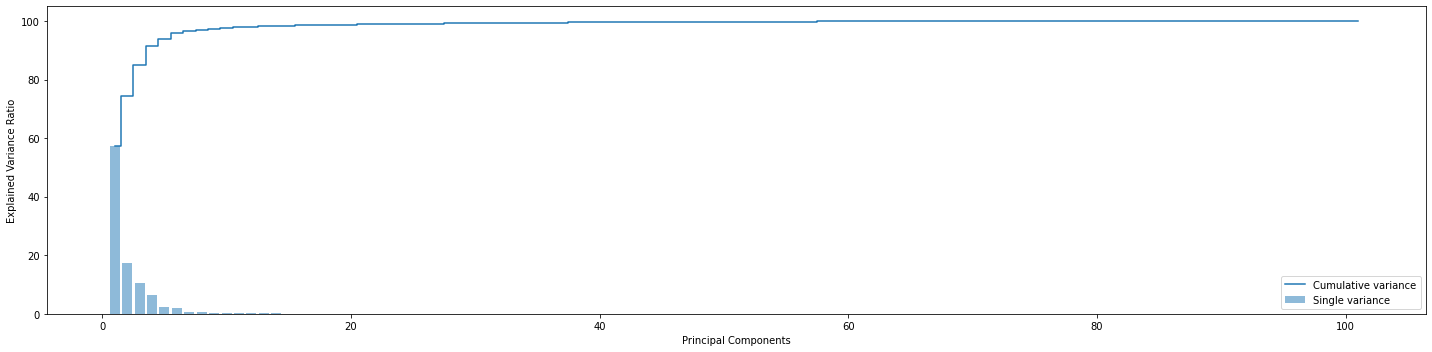

In [ ]:
# Plotting PCA and Cummulative variance
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), variance_explained, alpha = 0.5, align = 'center', label = 'Single variance')
plt.step(range(1, e_vals.size + 1), cum_variance, where='mid', label = 'Cumulative variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
# Getting 95% variance of the smote data
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(x_train_smote)
x_test_pca = pca.transform(x_test)

In [ ]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(1235, 6)
(84, 6)


In [ ]:
# Getting 95% variance of the original data
pca = PCA(n_components = 0.95)
x_train_pca2 = pca.fit_transform(x_train)
x_test_pca2 = pca.transform(x_test)

In [ ]:
print(x_train_pca2.shape)
print(x_test_pca2.shape)

(334, 15)
(84, 15)


Final Run of the Function for best Dataset and by enabling Hypertuning
- You can call the function as > results = design_train_test_classifiers(x_train, x_test, y_train, y_test, 't', 'f1_macro') to switch on hyper tuning. 
- You can call the function as > results = design_train_test_classifiers(x_train, x_test, y_train, y_test, 'f', 'f1_macro') to switch off hyper tuning.

In [ ]:
# Code here

In [ ]:
# Training and Testing all models on original dataset with hypertuning
design_train_test_classifiers(x_train, x_test, y_train, y_test, 't', 'f1_macro')

,name,accuracy,precision,recall,f1,model
0,LogisticRegression,0.5952381,0.1492537,0.1612903,0.1550388,"LogisticRegression(C=100, solver='liblinear')"
1,GaussianNB,0.4523810,0.2038055,0.1827957,0.1842017,GaussianNB(var_smoothing=0.01)
2,KNeighborsClassifier,0.7023810,0.2940541,0.2422043,0.2484163,"KNeighborsClassifier(n_neighbors=3, weights='d..."
3,DecisionTreeClassifier,0.7380952,0.2358442,0.2602151,0.2453891,"DecisionTreeClassifier(criterion='entropy', ma..."
4,RandomForestClassifier,0.7142857,0.1463415,0.1935484,0.1666667,"(DecisionTreeClassifier(max_features='log2', r..."
5,AdaBoostClassifier,0.4880952,0.2407407,0.2225806,0.2310345,"(DecisionTreeClassifier(max_depth=1, random_st..."
6,BaggingClassifier,0.7142857,0.1481481,0.1935484,0.1678322,(DecisionTreeClassifier(random_state=153771762...
7,GradientBoostingClassifier,0.6904762,0.2799228,0.2389785,0.2413725,([DecisionTreeRegressor(criterion='friedman_ms...
8,XGBClassifier,0.6547619,0.1486486,0.1774194,0.1617647,"XGBClassifier(eval_metric='mlogloss', gamma=0...."
9,LGBMClassifier,0.6428571,0.1958824,0.2043011,0.1994406,"LGBMClassifier(learning_rate=1.0, num_leaves=6)"


In [ ]:
# Training and Testing all models on upsampled dataset with hypertuning
design_train_test_classifiers(x_train_up, x_test, y_train_up, y_test, 't', 'f1_macro')

KeyboardInterrupt: ignored

In [ ]:
#Training and Testing all models on smote dataset with hypertuning
design_train_test_classifiers(x_train_smote, x_test, y_train_smote, y_test,'t', 'f1_macro')

<b> Final Observation and Remarks </b>: 
- TBD
- TBD
- TBD

In [ ]:
# Exit Milestone 1